In [1]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns

# <p align='center' style="color: #6c89c6;">Работу выполнил: Таратин Артём ПМ22-1</p>

In [2]:
data = load_breast_cancer()
X = data.data[:,:2]
y = data.target

In [3]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

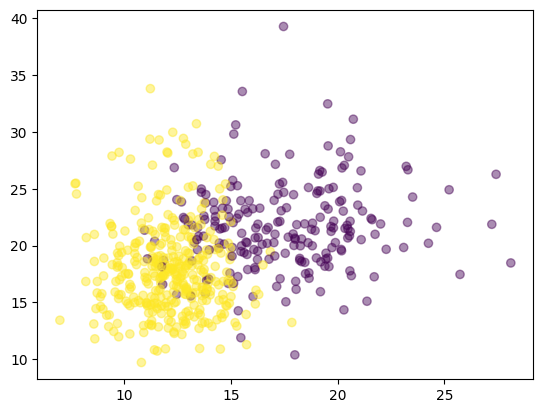

In [4]:
plt.scatter(df['mean radius'], df['mean texture'], c=df['target'], alpha=0.45)
plt.show()

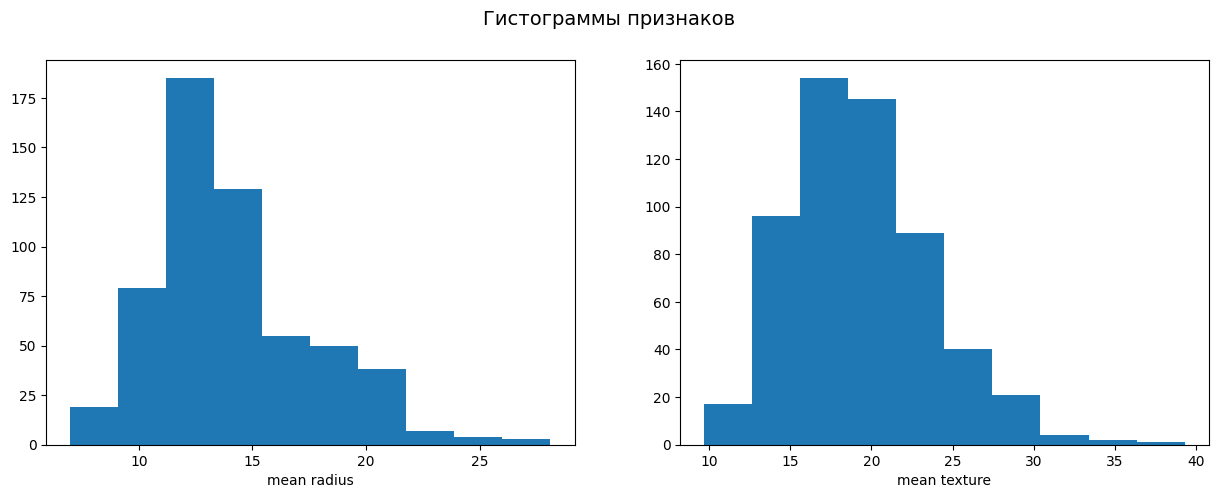

In [5]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [6]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

GaussianNB()

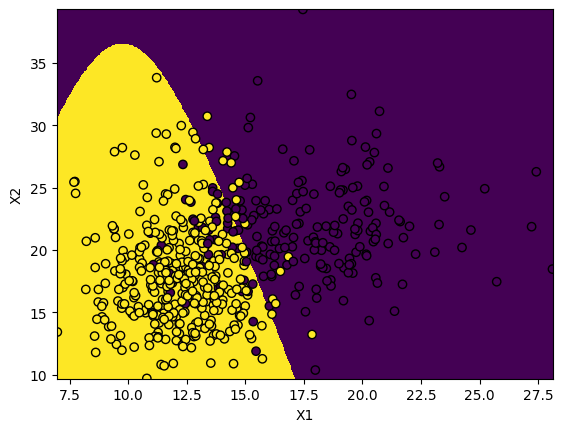

In [7]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = gaussian_nb.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print(f'Accuracy= {accuracy_score(y, y_pred):.4f}')
print(f'F1_score= {f1_score(y, y_pred):.4f}')

[[164  48]
 [ 17 340]]
Accuracy= 0.8858
F1_score= 0.9128


In [9]:
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = data.target
X.shape, y.shape

((569, 30), (569,))

In [10]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print(f'Accuracy= {accuracy_score(y, y_pred):.4f}')
print(f'F1_score= {f1_score(y, y_pred):.4f}')

[[189  23]
 [ 10 347]]
Accuracy= 0.9420
F1_score= 0.9546


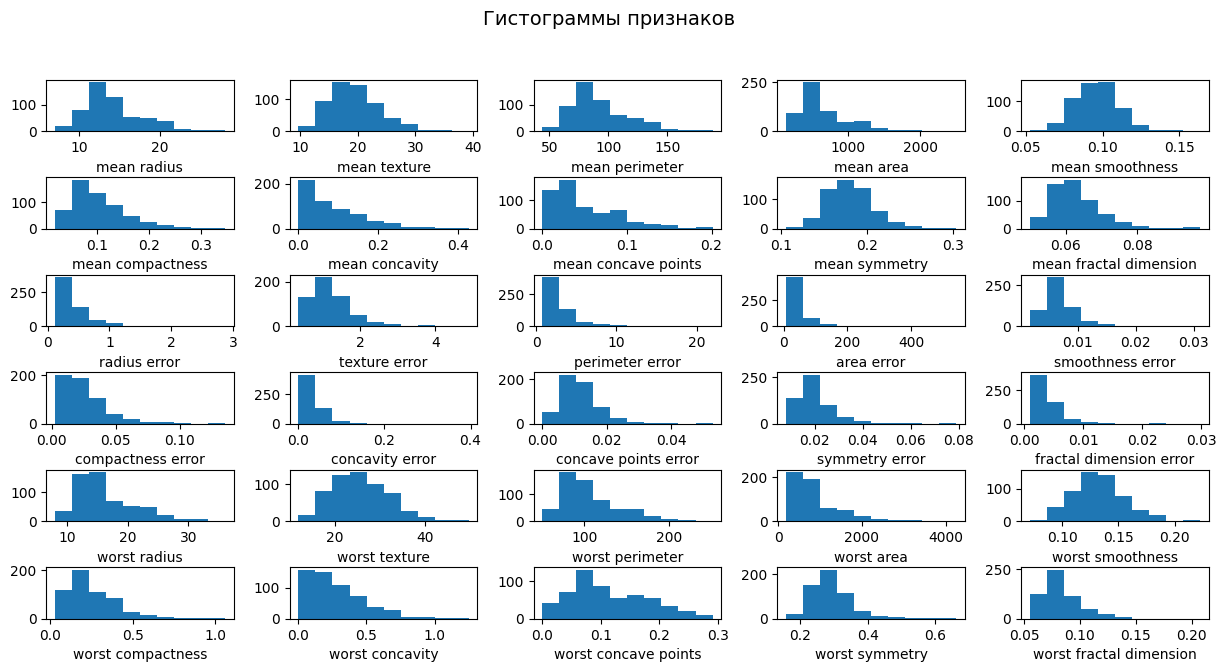

In [11]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [12]:
df = df.drop(['mean concavity','radius error',
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'],
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678,0


In [13]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print(f'Accuracy= {accuracy_score(y, y_pred):.4f}')
print(f'F1_score= {f1_score(y, y_pred):.4f}')

[[189  23]
 [ 10 347]]
Accuracy= 0.9420
F1_score= 0.9546


# <p align='center'>Задания для самостоятельного выполнения</p>

#### 1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [14]:
def show_info(gaussian_nb):
    gaussian_nb.fit(X, y)
    y_pred = gaussian_nb.predict(X)
    print(f'Модель= {gaussian_nb}')
    print(confusion_matrix(y, y_pred))
    print(f'Accuracy= {accuracy_score(y, y_pred):.4f}')
    print(f'F1_score= {f1_score(y, y_pred):.4f}', end='\n'*2)

In [15]:
models = [MultinomialNB(), BernoulliNB(), CategoricalNB(), ComplementNB()]
for model in models:
    show_info(model)

Модель= MultinomialNB()
[[163  49]
 [ 10 347]]
Accuracy= 0.8963
F1_score= 0.9216

Модель= BernoulliNB()
[[  0 212]
 [  0 357]]
Accuracy= 0.6274
F1_score= 0.7711

Модель= CategoricalNB()
[[192  20]
 [  3 354]]
Accuracy= 0.9596
F1_score= 0.9685

Модель= ComplementNB()
[[163  49]
 [ 11 346]]
Accuracy= 0.8946
F1_score= 0.9202



#### 2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [16]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML3.6%20bayes/titanic.csv', index_col=0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0,1
2,1,1,1,38.0,1,0,71.2833,1,0,0
3,1,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,0,35.0,0,0,8.0500,0,0,1


In [18]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

In [19]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X.iloc[:, 1:2], y)
show_info(gaussian_nb)

Модель= GaussianNB()
[[453  96]
 [ 94 248]]
Accuracy= 0.7868
F1_score= 0.7230



In [20]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)
show_info(gaussian_nb)

Модель= GaussianNB()
[[453  96]
 [ 94 248]]
Accuracy= 0.7868
F1_score= 0.7230



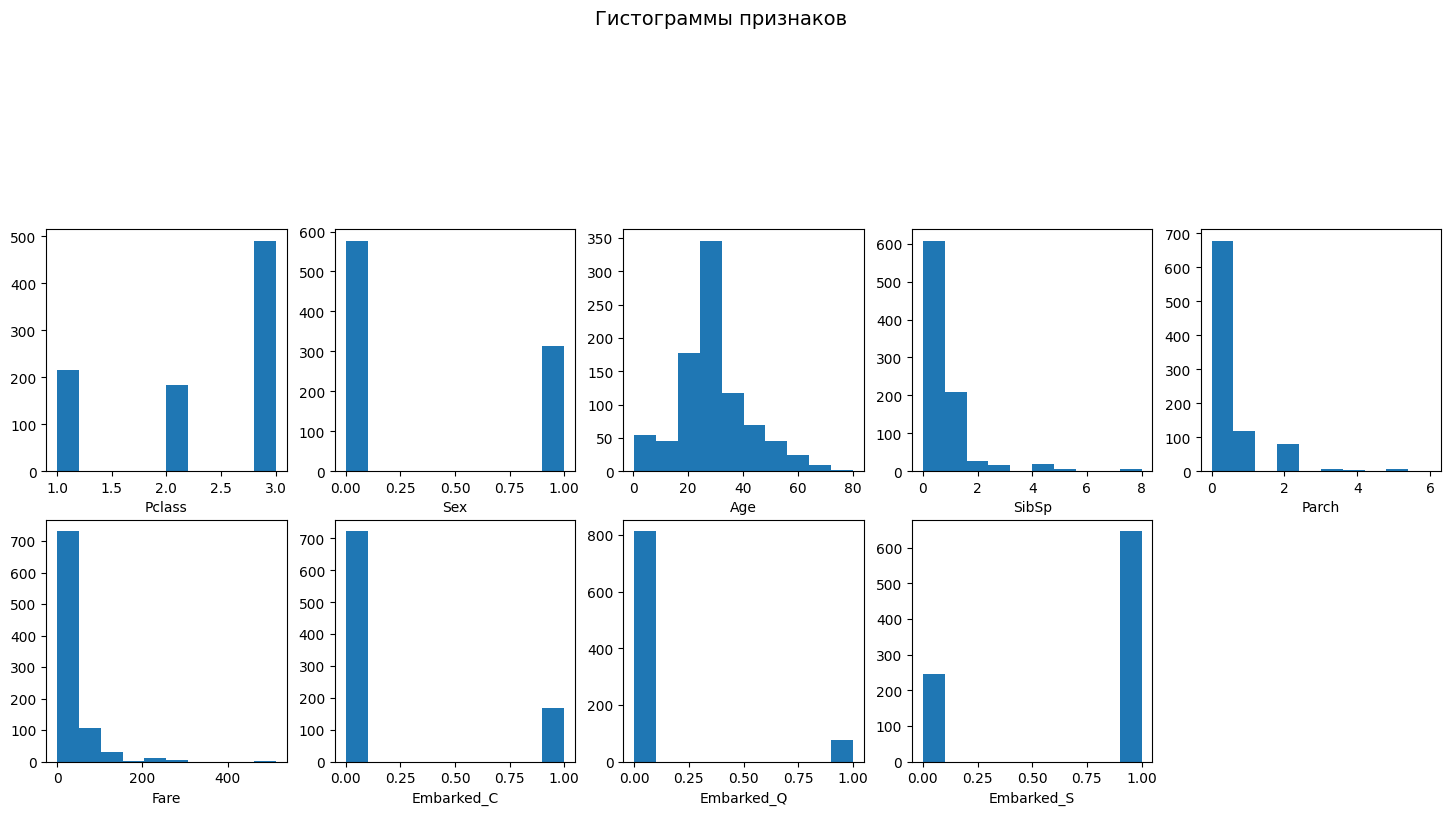

In [21]:
f = plt.figure(figsize=(18, 22))
for i in range(X.shape[1]):
    plt.subplot(6, 5, i+1)
    plt.hist(X.iloc[:, i])
    plt.xlabel(X.columns[i])
plt.suptitle('Гистограммы признаков', fontsize=14)
plt.show()

In [22]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']], y)
show_info(gaussian_nb)

Модель= GaussianNB()
[[453  96]
 [ 94 248]]
Accuracy= 0.7868
F1_score= 0.7230



#### 3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [23]:
train = pd.read_csv('titanic/train.csv', index_col=0)
train[['Sex', 'Cabin', 'Embarked']] = train[['Sex', 'Cabin', 'Embarked']].apply(lambda x: pd.factorize(x, use_na_sentinel=False)[0])
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,0
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,146,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,0,0


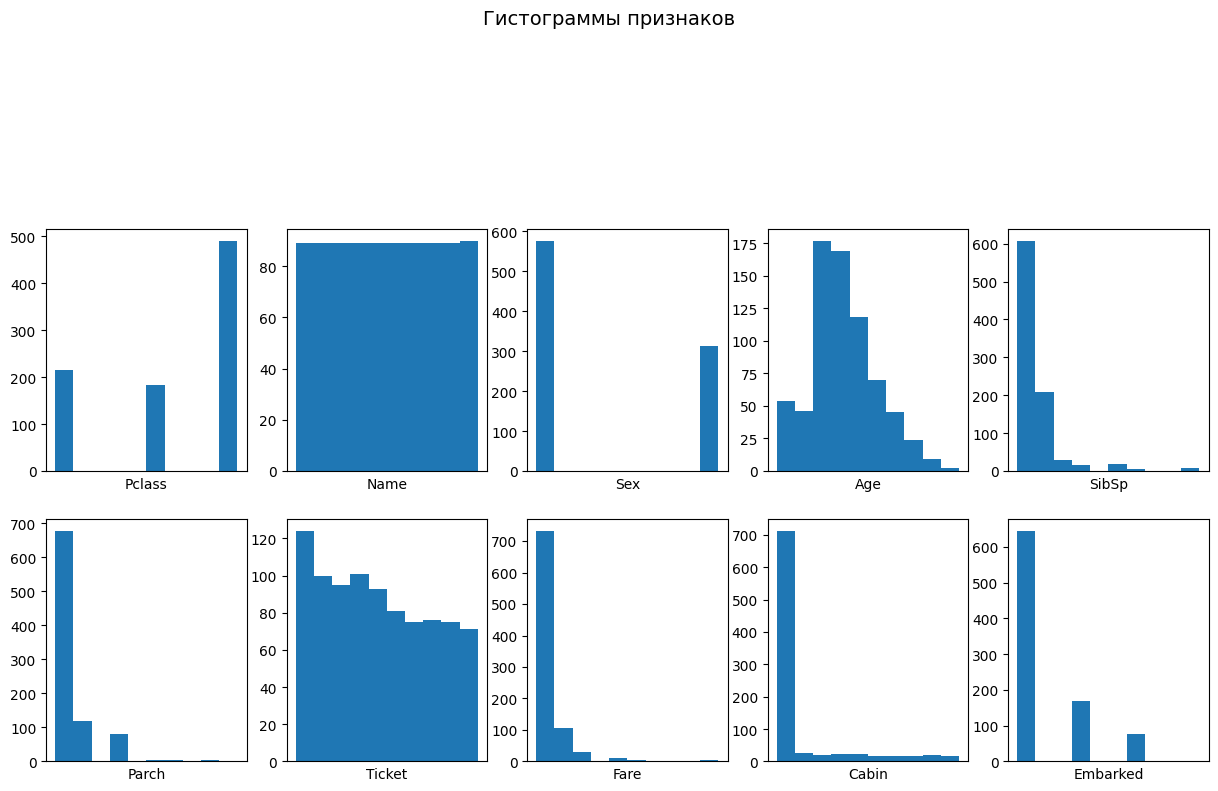

In [24]:
f = plt.figure(figsize=(15, 22))
X = train.drop(['Survived'], axis=1)
for i in range(X.shape[1]):
    plt.subplot(6, 5, i+1)
    plt.hist(X.iloc[:, i])
    plt.xlabel(X.columns[i])
    plt.xticks([])

plt.suptitle('Гистограммы признаков', fontsize=14)
plt.show()

In [25]:
X = train.dropna().drop(['Survived', 'Ticket', 'Name'], axis=1)
y = train.dropna().Survived
show_info(CategoricalNB())

Модель= CategoricalNB()
[[388  36]
 [ 81 209]]
Accuracy= 0.8361
F1_score= 0.7813

